### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Algoritmo quântico variacional 
(VQE = variational quantum eigensolver)

In [29]:
!pip install --upgrade pyscf

  Using cached pyscf-2.4.0.tar.gz (8.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pyscf


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [5 lines of output]
  running bdist_wheel
  running build
  running build_py
  cmake -SC:\Users\Usuário\AppData\Local\Temp\pip-install-r0k9wd4p\pyscf_b3f196d80d7c441fab1b64b877ed0d26\pyscf\lib -Bbuild\temp.win-amd64
  error: command 'cmake' failed: None
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyscf
ERROR: Could not build wheels for pyscf, which is required to install pyproject.toml-based projects


In [30]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

MissingOptionalLibraryError: "The 'pyscf' library is required to use 'PySCFDriver'.  See https://pyscf.org/install.html."

In [13]:
#!pip install qiskit_algorithms

In [14]:
from qiskit_algorithms.optimizers import SPSA # simultaneous perturbation stochastic approximation

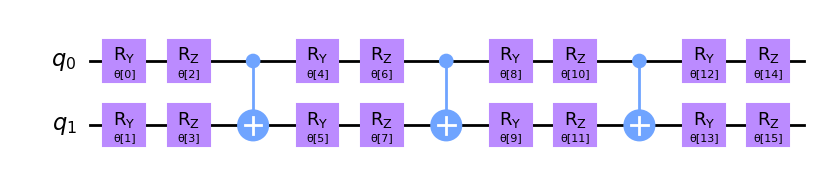

In [19]:
from qiskit.circuit.library import EfficientSU2 # ansatz para o circuito variacional

ansatz = EfficientSU2(2)

ansatz.decompose().draw('mpl')

In [16]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [20]:
callback = lambda nfev, params, fval, step, acc: print(f'Evaluation {nfev}: {fval}')

In [21]:
optimizer = SPSA(callback=callback, maxiter=1000)

In [ ]:
cost_func = lambda params: estimator.run(ansatz, H2_op, parameter_values=params).result().values[0]

In [ ]:
result = optimizer.minimize(cost_func, x0=np.zeros(ansatz.num_parameters))